# EDA

Kelompok 6

- Jidan Abdurahman Aufan (2205422)

- Daffa Fakhry Anshori (2200337)

- Alfen Fajri Nurulhaq (2201431)

- Muhammad Rifky Afandi (2202346)

- Adri Sapta Firmansyah

Pendahuluan

Pariwisata adalah salah satu sektor ekonomi yang memiliki peran penting dalam pertumbuhan ekonomi suatu wilayah. Di Provinsi Jawa Barat, sektor pariwisata memainkan peran yang signifikan dalam menghasilkan Pendapatan Asli Daerah (PAD). Data mengenai Pendapatan Asli Daerah Bidang Pariwisata ini mencakup berbagai informasi yang mencerminkan dinamika industri pariwisata di Jawa Barat. Data ini tidak hanya melibatkan jumlah pendapatan, tetapi juga faktor-faktor lain seperti jenis jenis nya juga

Pada Topik Jawa Barat ini, kami ingin melihat berapa banyak pendapatan didaerah berdasarkan sektor wisata di setiap kabupaten/kota di provinsi jawa barat, kami melakukan penyesuaian pada data supaya data bersih dan mengubah nama atribut supaya tidak ada anomali dalam data tersebut

Data yang dianalisis mencakup informasi mengenai kabupaten/kota yang ada di Jawa Barat, Sektor Wisata dan jumlah berupa (hotel, restoran dan retribusi wisata (misalnya tiket masuk dufan), dan hiburan), jumlah pengunjung, jumlah pendapatan

Melalui analisis eksploratif data (EDA), kita dapat menyelami data-data ini, mengungkap pola-pola tersembunyi, dan menemukan jawaban atas berbagai pertanyaan penting, seperti:

Bagaimana perkembangan pendapatan dari beberapa sektor pariwisata seiring berjalannya waktu?
Bagaimana sektor wisata berkembang di wilayah ini dan seberapa merata distribusinya?
Berapa banyak pengunjung / wisatawan yang mendatangi Jawa Barat sehingga mempengaruhi pendapatan?

Dengan eksplorasi data ini, kita dapat merumuskan hipotesis yang kuat, mengambil keputusan berdasarkan bukti, dan merancang strategi yang lebih cerdas untuk mendukung sektor pariwisata Jawa Barat dan mendorong pertumbuhan ekonomi yang berkelanjutan. 

### Dataset yang Digunakan

- Jumlah Pendapatan Asli Daerah Bidang Pariwisata Berdasarkan Sektor Wisata di Jawa Barat

- Jumlah Hotel Bintang dan Non Bintang Berdasarkan Jenis Hotel dan Kabupaten/Kota di Jawa Barat

- Jumlah Usaha Restoran, Rumah Makan, Cafe Berdasarkan Kabupaten/Kota di Jawa Barat (link deprecated)

- Jumlah Pengunjung ke Akomodasi Wisata Berdasarkan Jenis Wisatawan dan Kabupaten/Kota di Jawa Barat

### Praproses Data

Membuang attribut yang tidak diperlukan

Mengatasi yang tidak terdata?

In [1]:
# display
%matplotlib inline  
# numerik
import numpy as np 
# analisis
import pandas as pd 
# plot
import matplotlib.pyplot as plt  
# visualisasi
import seaborn as sns

### Load Dataset

In [2]:
df_utama = pd.read_csv("Utama.csv")
df_wisatawan = pd.read_csv("Wisatawan.csv")
df_hotel = pd.read_csv("Jumlah_Hotel_Per_Kategori.csv")
df_restoran = pd.read_csv("Jumlah_Restoran_Kafe.csv")

Mengeksplorasi Dataset Pendapatan per Sektor Pariwisata

In [3]:
df_utama.info()
df_utama.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   752 non-null    int64 
 1   kode_provinsi        752 non-null    int64 
 2   nama_provinsi        752 non-null    object
 3   kode_kabupaten_kota  752 non-null    int64 
 4   nama_kabupaten_kota  752 non-null    object
 5   sektor_wisata        752 non-null    object
 6   jumlah_pendapatan    752 non-null    int64 
 7   satuan               752 non-null    object
 8   tahun                752 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 53.0+ KB


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014


Membuang attribut 'kode_provinsi' dan 'nama_provisi' karena seluruh dataset hanya Jawa Barat, juga membuang 'satuan' karena dianggap sudah jelas satuan 'jumlah_pendapatan' adalah Rupiah

In [4]:
df_utama = df_utama[["kode_kabupaten_kota", "nama_kabupaten_kota", "sektor_wisata", "jumlah_pendapatan", "satuan", "tahun"]]
df_utama.head()

,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014


Mengecek data yang nilai jumlah_pendapatan nya 0

In [5]:
df_utama.isin([0]).sum()

kode_kabupaten_kota      0
nama_kabupaten_kota      0
sektor_wisata            0
jumlah_pendapatan      218
satuan                   0
tahun                    0
dtype: int64

Berasumsi bahwa nilai 0 dari jumlah_pendapatan adalah sebuah anomali, maka akan diisi dengan rata-rata nilai jumlah_pendapatan dari sektor_wisata dan kabupaten/kota tahun lain yang tidak 0

In [6]:
filtered_df = df_utama[df_utama["jumlah_pendapatan"] != 0]
mean_per_group = filtered_df.groupby(["sektor_wisata", "nama_kabupaten_kota"])["jumlah_pendapatan"].agg("mean").rename("mean").astype(int).reset_index()
mean_per_group


,sektor_wisata,nama_kabupaten_kota,mean
0,HIBURAN,KABUPATEN BANDUNG,1955432178
1,HIBURAN,KABUPATEN BANDUNG BARAT,1290172473
2,HIBURAN,KABUPATEN BEKASI,10189032951
3,HIBURAN,KABUPATEN BOGOR,17485863886
4,HIBURAN,KABUPATEN CIAMIS,162809639
...,...,...,...
101,RETRIBUSI,KOTA CIMAHI,35052000
102,RETRIBUSI,KOTA CIREBON,22500000
103,RETRIBUSI,KOTA DEPOK,1104655022
104,RETRIBUSI,KOTA SUKABUMI,77470000


In [7]:
# Membuat dataframe gabungan dari df_utama dan nilai rata-rata tiap area per sektor
df = pd.merge(df_utama, mean_per_group, how='left', on=["sektor_wisata", "nama_kabupaten_kota"])
# Mengubah nilai 0 menjadi NaN agar bisa diisi oleh .fillna() dengan mean
df['jumlah_pendapatan'] = df['jumlah_pendapatan'].replace({0:np.nan})
# Mengisi NaN dengan mean
df['jumlah_pendapatan'].fillna(df['mean'], inplace=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 751
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  752 non-null    int64  
 1   nama_kabupaten_kota  752 non-null    object 
 2   sektor_wisata        752 non-null    object 
 3   jumlah_pendapatan    738 non-null    float64
 4   satuan               752 non-null    object 
 5   tahun                752 non-null    int64  
 6   mean                 738 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 47.0+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun,mean
0,3201,KABUPATEN BOGOR,HOTEL,5.721087e+10,RUPIAH,2014,5.721087e+10
1,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,2.794664e+10,RUPIAH,2014,4.317442e+10
2,3201,KABUPATEN BOGOR,HIBURAN,7.077431e+09,RUPIAH,2014,1.748586e+10
3,3201,KABUPATEN BOGOR,RETRIBUSI,4.852551e+08,RUPIAH,2014,3.733663e+08
4,3202,KABUPATEN SUKABUMI,HOTEL,1.467414e+09,RUPIAH,2014,1.467414e+09


Mengecek kekurangan nilai mean

In [8]:
df['mean'].isna().sum()
# del df['mean']

14

Untuk nilai jumlah_pendapatan yang masih NaN dikarenakan tidak didapat nilai mean untuk mengisinya dikarenakan memang tidak ada data sama sekali dari seluruh data poin per tahun, memutuskan untuk di drop

In [9]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 751
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  752 non-null    int64  
 1   nama_kabupaten_kota  752 non-null    object 
 2   sektor_wisata        752 non-null    object 
 3   jumlah_pendapatan    738 non-null    float64
 4   satuan               752 non-null    object 
 5   tahun                752 non-null    int64  
 6   mean                 738 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 47.0+ KB


kode_kabupaten_kota     0
nama_kabupaten_kota     0
sektor_wisata           0
jumlah_pendapatan      14
satuan                  0
tahun                   0
mean                   14
dtype: int64

In [10]:
df.dropna(inplace=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 751
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  738 non-null    int64  
 1   nama_kabupaten_kota  738 non-null    object 
 2   sektor_wisata        738 non-null    object 
 3   jumlah_pendapatan    738 non-null    float64
 4   satuan               738 non-null    object 
 5   tahun                738 non-null    int64  
 6   mean                 738 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 46.1+ KB


kode_kabupaten_kota    0
nama_kabupaten_kota    0
sektor_wisata          0
jumlah_pendapatan      0
satuan                 0
tahun                  0
mean                   0
dtype: int64

Menghapus attribut mean karena sudah tidak dibutuhkan

In [11]:
del df['mean']

Memperbaiki data type yang terubah menjadi float kembali ke integer

In [12]:
df['jumlah_pendapatan'] = df['jumlah_pendapatan'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 751
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  738 non-null    int64 
 1   nama_kabupaten_kota  738 non-null    object
 2   sektor_wisata        738 non-null    object
 3   jumlah_pendapatan    738 non-null    int64 
 4   satuan               738 non-null    object
 5   tahun                738 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.4+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,3201,KABUPATEN BOGOR,HOTEL,57210871840,RUPIAH,2014
1,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,3202,KABUPATEN SUKABUMI,HOTEL,1467414073,RUPIAH,2014


Distribusi Pendapatan Per Sektor 

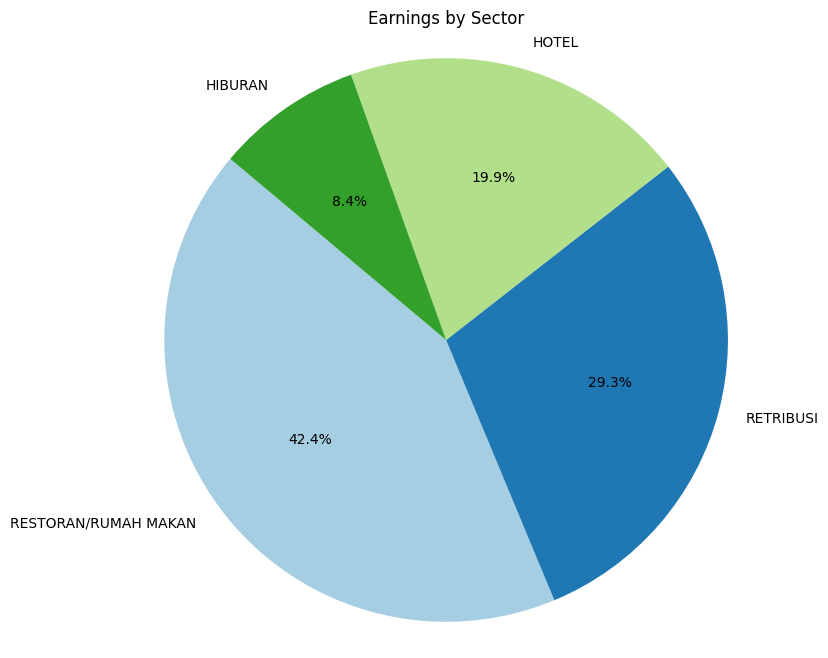

In [13]:
sector_earnings = df.groupby('sektor_wisata')['jumlah_pendapatan'].sum()

# Sort the sectors by earnings in descending order
sorted_sectors = sector_earnings.sort_values(ascending=False)

colors = plt.cm.Paired(range(len(sorted_sectors)))

# Create a pie chart to visualize the earnings for each sector
plt.figure(figsize=(8, 8))
plt.pie(sorted_sectors, labels=sorted_sectors.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Earnings by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

Top 5 Kabupaten/Kota berdasarkan Sektor

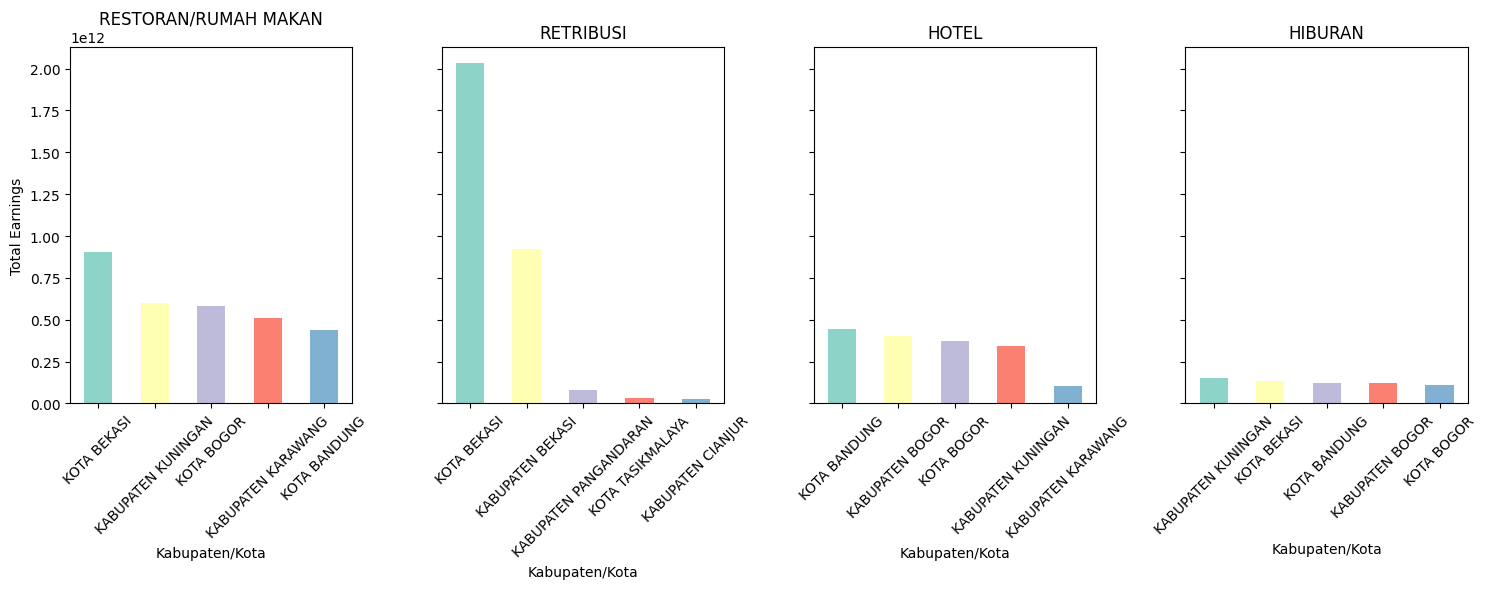

In [14]:
# Assuming you have a DataFrame named df
# Number of top regions to display
top_n_regions = 5

# Group by the 'sektor_wisata' and calculate the total earnings for each sector
sector_earnings = df.groupby('sektor_wisata')['jumlah_pendapatan'].sum()

# Sort the sectors by earnings in descending order
sorted_sectors = sector_earnings.sort_values(ascending=False)

# Create a subplot with multiple axes, one for each sector
fig, axes = plt.subplots(nrows=1, ncols=len(sorted_sectors), figsize=(15, 6), sharey=True)

# Define a color palette from Seaborn
colors = sns.color_palette("Set3", top_n_regions)

for i, sector in enumerate(sorted_sectors.index):
    # Filter data for the current sector
    df_sector = df[df['sektor_wisata'] == sector]
    
    # Group by the 'nama_kabupaten_kota' and calculate the total earnings for each region
    region_earnings = df_sector.groupby('nama_kabupaten_kota')['jumlah_pendapatan'].sum()
    
    # Sort the regions by earnings in descending order and select the top N
    top_regions = region_earnings.sort_values(ascending=False).head(top_n_regions)
    
    # Create a bar plot for the current sector
    top_regions.plot(kind='bar', color=colors, ax=axes[i])
    
    axes[i].set_title(sector)
    axes[i].set_xlabel('Kabupaten/Kota')
    axes[i].set_ylabel('Total Earnings')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


Membuat Agregasi Pendapatan Secara Keseluruhan Pertahun

In [15]:
df_utama_total = df.copy()
df_utama_total["total_pendapatan"] = df_utama_total.groupby(['kode_kabupaten_kota', 'tahun'])['jumlah_pendapatan'].transform('sum')
df_utama_total = df_utama_total.drop_duplicates(subset=['kode_kabupaten_kota', 'tahun'])
# Membuang attribut sisa dari agregasi
df_utama_total = df_utama_total[["kode_kabupaten_kota", "nama_kabupaten_kota", "total_pendapatan", "tahun"]]
df_utama_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 748
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  188 non-null    int64 
 1   nama_kabupaten_kota  188 non-null    object
 2   total_pendapatan     188 non-null    int64 
 3   tahun                188 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.3+ KB


/tmp/ipykernel_6199/884909673.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_utama_total, x='tahun', y='total_pendapatan', estimator='sum', ci=None)


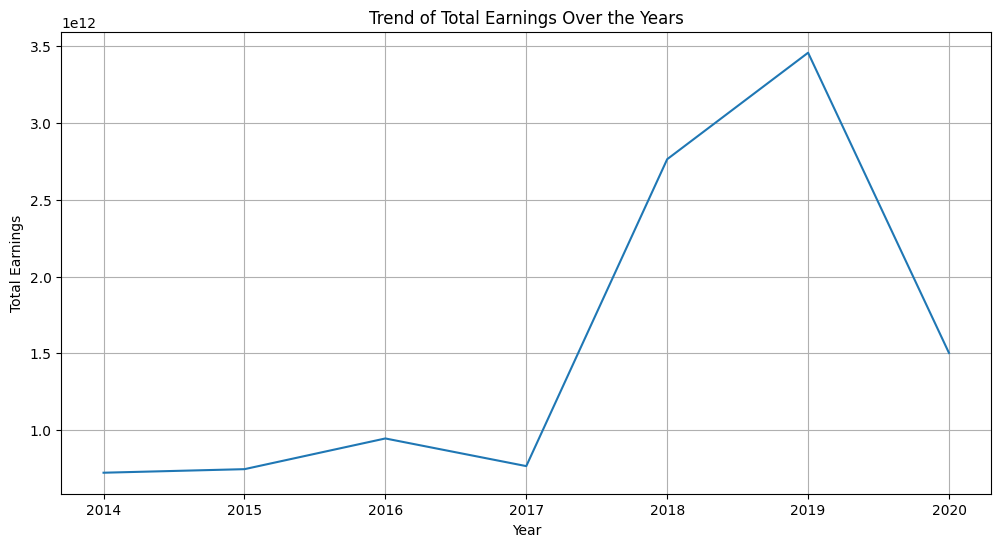

In [16]:
df_utama_total = df_utama_total.sort_values(by='tahun')

# Create a line plot to show the trend of total earnings over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_utama_total, x='tahun', y='total_pendapatan', estimator='sum', ci=None)
plt.title('Trend of Total Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.grid(True)

plt.show()


Mengeksplorasi Dataset Jumlah Wisatawan

In [17]:
# df_wisatawan.isin([0]).sum()
df_wisatawan.info()
df_wisatawan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   430 non-null    int64 
 1   kode_provinsi        430 non-null    int64 
 2   nama_provinsi        430 non-null    object
 3   kode_kabupaten_kota  430 non-null    int64 
 4   nama_kabupaten_kota  430 non-null    object
 5   jenis_wisatawan      430 non-null    object
 6   jumlah_pengunjung    430 non-null    int64 
 7   satuan               430 non-null    object
 8   tahun                430 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 30.4+ KB


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,47719,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,1290897,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,49138,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,443795,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,6421,ORANG,2014


Membuang attribut yang tidak diinginkan dan membuang satuan karena semua satuan value jumlah_pengunjung sama, yaitu jiwa/orang

In [18]:
df_wisatawan = df_wisatawan[["kode_kabupaten_kota", "nama_kabupaten_kota", "jenis_wisatawan", "jumlah_pengunjung", "tahun"]]
df_wisatawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  430 non-null    int64 
 1   nama_kabupaten_kota  430 non-null    object
 2   jenis_wisatawan      430 non-null    object
 3   jumlah_pengunjung    430 non-null    int64 
 4   tahun                430 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.9+ KB


Menghitung aggregasi jumlah semua wisatawan tanpa melihat kategori

In [19]:
# Menyimpan copy untuk agregasi wisatawan mancanegara & nusantara
df_wisatawan_mancanegara = df_wisatawan[df_wisatawan["jenis_wisatawan"] == "MANCANEGARA"].copy()
df_wisatawan_nusantara = df_wisatawan[df_wisatawan["jenis_wisatawan"] == "NUSANTARA"].copy()

df_wisatawan['total_pengunjung'] = df_wisatawan.groupby([ 'kode_kabupaten_kota', 'tahun'])['jumlah_pengunjung'].transform('sum')

# Reset the index
df_wisatawan = df_wisatawan.reset_index(drop=True)
df_wisatawan.head()


,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,tahun,total_pengunjung
0,3201,KABUPATEN BOGOR,MANCANEGARA,47719,2014,1338616
1,3201,KABUPATEN BOGOR,NUSANTARA,1290897,2014,1338616
2,3202,KABUPATEN SUKABUMI,MANCANEGARA,49138,2014,492933
3,3202,KABUPATEN SUKABUMI,NUSANTARA,443795,2014,492933
4,3203,KABUPATEN CIANJUR,MANCANEGARA,6421,2014,173022


Membuat Data Frame baru yang merupakan hasil agregasi total wisatawan

In [20]:

df_wisatawan_total = df_wisatawan.drop_duplicates(subset=['tahun', 'kode_kabupaten_kota'])
# Reset the index
df_wisatawan_total = df_wisatawan.reset_index(drop=True)
df_wisatawan_total.info()
df_wisatawan_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  430 non-null    int64 
 1   nama_kabupaten_kota  430 non-null    object
 2   jenis_wisatawan      430 non-null    object
 3   jumlah_pengunjung    430 non-null    int64 
 4   tahun                430 non-null    int64 
 5   total_pengunjung     430 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 20.3+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,tahun,total_pengunjung
0,3201,KABUPATEN BOGOR,MANCANEGARA,47719,2014,1338616
1,3201,KABUPATEN BOGOR,NUSANTARA,1290897,2014,1338616
2,3202,KABUPATEN SUKABUMI,MANCANEGARA,49138,2014,492933
3,3202,KABUPATEN SUKABUMI,NUSANTARA,443795,2014,492933
4,3203,KABUPATEN CIANJUR,MANCANEGARA,6421,2014,173022


Mengeksplorasi Dataset Usaha Restoran & Kafe

In [21]:
df_restoran.info()
df_restoran.head()
# df_restoran.isna().sum()
# df_restoran.isin([0]).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   242 non-null    int64 
 1   kode_provinsi        242 non-null    int64 
 2   nama_provinsi        242 non-null    object
 3   kode_kabupaten_kota  242 non-null    int64 
 4   nama_kabupaten_kota  242 non-null    object
 5   jumlah_usaha         242 non-null    int64 
 6   satuan               242 non-null    object
 7   tahun                242 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 15.2+ KB


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_usaha,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,86,UNIT,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,63,UNIT,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,193,UNIT,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,467,UNIT,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,85,UNIT,2013


Membuang atribut yang tidak digunakan

In [22]:
df_restoran = df_restoran[["kode_kabupaten_kota", "nama_kabupaten_kota", "jumlah_usaha", "tahun"]]
df_restoran.info()
df_restoran.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  242 non-null    int64 
 1   nama_kabupaten_kota  242 non-null    object
 2   jumlah_usaha         242 non-null    int64 
 3   tahun                242 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_usaha,tahun
0,3201,KABUPATEN BOGOR,86,2013
1,3202,KABUPATEN SUKABUMI,63,2013
2,3203,KABUPATEN CIANJUR,193,2013
3,3204,KABUPATEN BANDUNG,467,2013
4,3205,KABUPATEN GARUT,85,2013


In [33]:
df_hotel.head()
df_hotel.info()
df_hotel.isin([0]).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1183 non-null   int64 
 1   kode_provinsi        1183 non-null   int64 
 2   nama_provinsi        1183 non-null   object
 3   kode_kabupaten_kota  1183 non-null   int64 
 4   nama_kabupaten_kota  1183 non-null   object
 5   jenis_hotel          1183 non-null   object
 6   jumlah_hotel         1183 non-null   int64 
 7   satuan               1183 non-null   object
 8   tahun                1183 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 83.3+ KB


id                       0
kode_provinsi            0
nama_provinsi            0
kode_kabupaten_kota      0
nama_kabupaten_kota      0
jenis_hotel              0
jumlah_hotel           573
satuan                   0
tahun                    0
dtype: int64

Membuat Data Frame Agregasi Total Jumlah Hotel

In [24]:
df_hotel_agg = df_hotel.copy()
df_hotel_agg['total_hotel'] = df_hotel_agg.groupby(['kode_kabupaten_kota', 'tahun'])['jumlah_hotel'].transform('sum')
df_hotel_agg = df_hotel_agg.drop_duplicates(subset=['tahun', 'kode_kabupaten_kota'])
df_hotel_agg = df_hotel_agg[["kode_kabupaten_kota", "nama_kabupaten_kota", "total_hotel", "tahun"]]
df_hotel_agg.info()
df_hotel_agg.isin([0]).sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 1177
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  215 non-null    int64 
 1   nama_kabupaten_kota  215 non-null    object
 2   total_hotel          215 non-null    int64 
 3   tahun                215 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.4+ KB


kode_kabupaten_kota     0
nama_kabupaten_kota     0
total_hotel            30
tahun                   0
dtype: int64

In [25]:

df_utama_hotel = pd.merge(df.where(df["sektor_wisata"] == "HOTEL"), df_hotel_agg, how="inner", on=["kode_kabupaten_kota", "tahun", "nama_kabupaten_kota"]).reset_index()
df_utama_hotel = df_utama_hotel[["kode_kabupaten_kota", "nama_kabupaten_kota","total_hotel", "jumlah_pendapatan",  "tahun"]]
conversion = {"kode_kabupaten_kota" : int, "jumlah_pendapatan" : int, "total_hotel" : int, "tahun" : int}
df_utama_hotel = df_utama_hotel.astype(conversion)
df_utama_hotel.info()
df_utama_hotel.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  188 non-null    int64 
 1   nama_kabupaten_kota  188 non-null    object
 2   total_hotel          188 non-null    int64 
 3   jumlah_pendapatan    188 non-null    int64 
 4   tahun                188 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,total_hotel,jumlah_pendapatan,tahun
0,3201,KABUPATEN BOGOR,22,57210871840,2014
1,3202,KABUPATEN SUKABUMI,3,1467414073,2014
2,3203,KABUPATEN CIANJUR,12,4337767572,2014
3,3204,KABUPATEN BANDUNG,3,2311227053,2014
4,3205,KABUPATEN GARUT,6,1446990400,2014


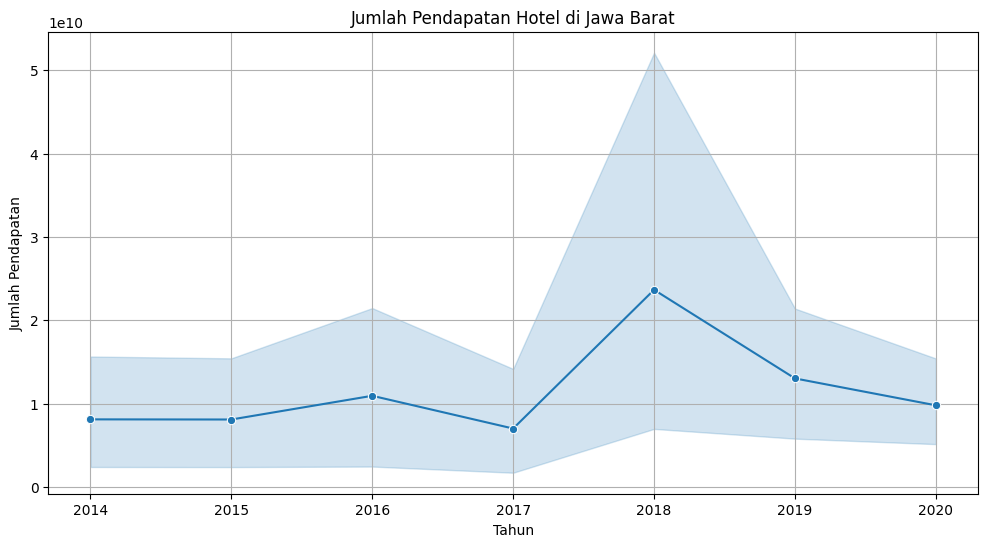

In [26]:
# Membuat line plot jumlah pendapatan per tahun tanpa hue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_utama_hotel, x='tahun', y='jumlah_pendapatan', marker='o')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pendapatan')
plt.title('Jumlah Pendapatan Hotel di Jawa Barat')
plt.grid(True)
plt.show()

### Penjelasan:

Grafik di atas menggambarkan tren pendapatan di Jawa Barat dari tahun 2014 hingga 2020. Sumbu X mewakili tahun, sedangkan sumbu Y menggambarkan jumlah pendapatan dalam miliaran rupiah.

Tahun 2018 terlihat lonjakan mendalam dalam pendapatan. Penjelasan utamanya adalah penyelenggaraan ASEAN Games di wilayah ini. Kehadiran ribuan atlet, pejabat, dan wisatawan yang datang untuk acara tersebut meningkatkan permintaan akan akomodasi hotel secara dramatis, yang menciptakan lonjakan pendapatan signifikan selama tahun tersebut. Dengan adanya ASEAN Games di tahun 2018, pendapatan hotel di Jawa Barat mengalami peningkatan yang drastis dan menjadi puncak dalam data tersebut. Acara besar semacam ini bisa menjadi katalisator signifikan dalam pertumbuhan pendapatan hotel dalam satu tahun tertentu, tetapi penting juga untuk mempertimbangkan faktor-faktor lain yang memengaruhi tren jangka panjang dalam industri perhotelan. 

Kemungkinan Tahun 2018 naik drastis : https://kumparan.com/bandungkiwari/5-cabang-olahraga-asian-games-2018-yang-digelar-di-jabar-1533295225512258245

In [28]:
df_restoran.isin([0]).sum()


kode_kabupaten_kota     0
nama_kabupaten_kota     0
jumlah_usaha           13
tahun                   0
dtype: int64

Merge df y

In [29]:
df_utama_restoran = pd.merge(df.where(df["sektor_wisata"] == "RESTORAN/RUMAH MAKAN"), df_restoran, how="inner", on=["kode_kabupaten_kota", "nama_kabupaten_kota", "tahun"])
df_utama_restoran = df_utama_restoran[["kode_kabupaten_kota", "nama_kabupaten_kota", "jumlah_usaha", "jumlah_pendapatan", "tahun"]]

df_utama_restoran.info()
df_utama_restoran.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  181 non-null    float64
 1   nama_kabupaten_kota  181 non-null    object 
 2   jumlah_usaha         181 non-null    int64  
 3   jumlah_pendapatan    181 non-null    float64
 4   tahun                181 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.5+ KB


kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_usaha           0
jumlah_pendapatan      0
tahun                  0
dtype: int64

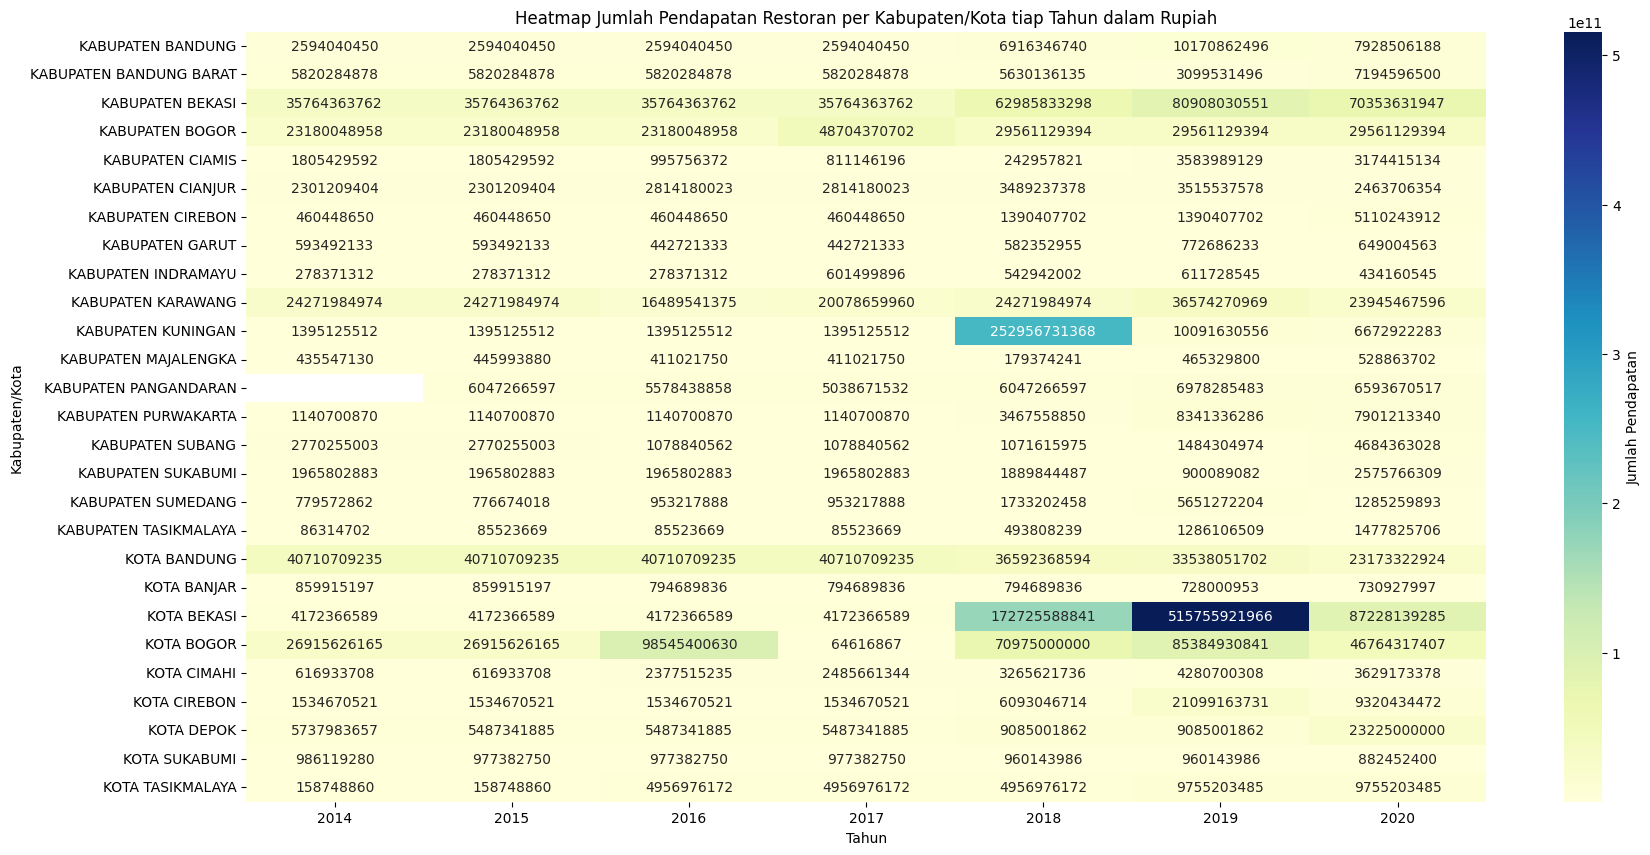

In [30]:
# Mengatur ukuran plot
plt.figure(figsize=(20, 10))

# Membuat heatmap
heatmap_data = df.pivot_table(index='nama_kabupaten_kota', columns='tahun', values='jumlah_pendapatan')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True,fmt='.0f' ,cbar_kws={'label': 'Jumlah Pendapatan'})
plt.title("Heatmap Jumlah Pendapatan Restoran per Kabupaten/Kota tiap Tahun dalam Rupiah")
plt.xlabel("Tahun")
plt.ylabel("Kabupaten/Kota")
plt.show()


Membuat Agregasi Pendapatan Restoran tiap Kabupaten atau Kota di Jawa Barat Secara Keseluruhan Pertahun, adapun dari data diatas kita dapat melihat Kota Bekasi mengalami lonjakan pendapatan di bidang industri makanan pada tahun 2019, hal ini disebabkan karena berbagai macam acara yang diselenggarakan oleh Kota Bekasi seperti Bekasi Discount, yang diselenggarakan di Mall dan Hotel Kota Bekasi (10 Februari - 10 Maret), lalu ada juga Bekasi Night Carnival di Summarecon Mall Bekasi, dari berita tersebut dapat kita ketahui bahwa hampir setiap event di bekasi diseleggarakan di mall sehingga memungkinkan pengunjung dan wisatawan datang pada setiap restoran yang ada di mall sambil menikmati event tersebut adapun event Bekasi Night Carnival bertepatan dengan hari jadi ulang tahun kota Bekasi, hal ini dapat menjadi sebab mengapa di tahun 2019 Kota Bekasi mengalami lonjakan pendapatan di Bidang Industri Makanan 

Sumber : https://travel.detik.com/travel-news/d-4428766/bekasi-keren-ini-kalender-wisatanya-tahun-2019

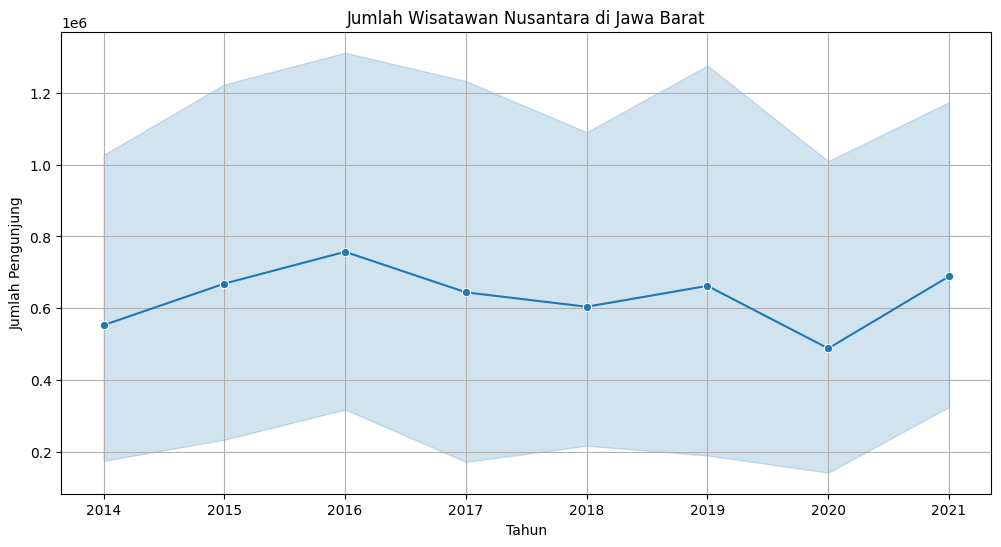

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_wisatawan_nusantara, x='tahun', y='jumlah_pengunjung', marker='o')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pengunjung")
plt.title("Jumlah Wisatawan Nusantara di Jawa Barat")
plt.grid(True)
plt.show()


Berdasarkan grafik di atas, terjadi peningkatan jumlah wisatawan nusantara pada rentang tahun 2014 - 2016, Namun, terjadi penurunan pada tahun 2016 - 2018. Lalu, jumlah wisatawan Nusantara kembali meningkat pada tahun 2019. Akan tetapi, pada tahun 2020,  kembali menurun akibat pandemi COVID-19. Pada tahun 2021, yaitu masa pemulihan dari COVID-19, jumlah wisatawan Nusantara kembali meningkat.

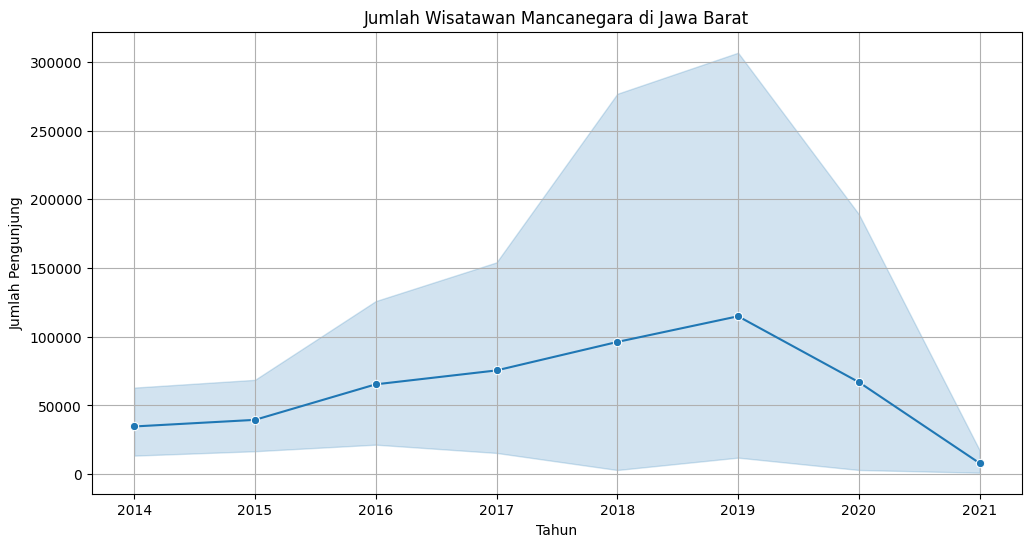

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_wisatawan_mancanegara, x='tahun', y='jumlah_pengunjung', marker='o')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pengunjung")
plt.title("Jumlah Wisatawan Mancanegara di Jawa Barat")
plt.grid(True)
plt.show()


Berdasarkan Grafik di atas, dapat diketahui bahwa terjadi peningkatan jumlah wisatawan mancanegara di jawa barat pada rentang waktu 2016 - 2019. Namun, pada tahun 2020, terjadi penurunan jumlah wisatawan mancanegara akibat pandemi COVID-19. 

Lalu, pada tahun 2021 jumlah wisatawan mancanegara tetap tidak menunjukkan kenaikan jumlah akibat regulasi di negara asal wisatawan mancanegara mengenai pembatasan mobilisasi antar negara pada masa COVID-19.

Sumber: https://www.antaranews.com/berita/1544636/akibat-covid-19-kunjungan-wisatawan-ke-jawa-barat-turun

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d43b66c9-546b-4310-9ebd-14779535929d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>